# Soal 1: Law of Large Numbers

Menurut Law of Large Numbers (LLN) jika kita mengulang suatu percobaan, semakin banyak kita mengulang maka rata-rata hasil yang di dapat akan mendekati apa yang kita perkirakan.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/e8dff3831b1e5b6f0e187c733583ab8d02574363)

Sebagai caontoh, sebuah dadu dengan 6-sisi akan menghasilkan angka 1, 2, 3, 4, 5, atau 6 dengan probabilitas yang sama untuk masing-masing angkanya. Maka, perkiraan rata-rata hasil yang akan di dapat adalah (1+2+3+4+5+6)/6 = 3.5
Menurut LLN, semakin banyak kita mengocok dadu, maka rata-rata hasil yang didapatkan akan semakin mendekati nilai perkiraan rata-ratanya yaitu 3.5

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Lawoflargenumbers.svg/400px-Lawoflargenumbers.svg.png)

Begitu juga jika kita memiliki sebuah dataset berisi angka-angka acak dengan nilai rata-rata(μ) = 0 dan standar deviasi(σ) = 1, maka angka-angka tersebut akan terdistribusi secara normal dengan semakin banyaknya isi dari dataset tersebut.

![alt text](https://img.favpng.com/9/9/7/standard-deviation-normal-distribution-mean-statistics-png-favpng-5cX7qC8aqmp0pQthmW3nSVj9a.jpg)

Dari gambar di atas, maka semakin banyaknya isi dari dataset, jumlah angka-angka pada dataset yang memiliki nilai -1 < angka < 1 akan semakin mendekati 68.2%.
Lengkapi code dibawah ini untuk membuktikan hal tersebut.


In [ ]:
import numpy as np
from numpy.random import randn

N = 2000000               #Tentukan ukuran sampel
counter = 0               #Untuk mereset perhitungan
lst_rand = randn(N)

for x in lst_rand :       #Mulai iterasi dan tambahkan nilai counter jika memenuhi syarat
  if (x > -1) and (x < 1):
    counter += 1

hasil = counter/N * 100   #Hitung nilai persentase jumlahnya
print(str(hasil) + "%")

68.21445%


---

# Soal 2: Menghitung nilai-nilai dari statistika deskriptif

In [ ]:
import statistics
import numpy as np
import scipy.stats

#Berikut adalah data dari breast cancer dataset, area dan status mematikan atau tidaknya

area = [1001. , 1326. , 1203. ,  386.1, 1297. ,  477.1, 1040. ,  577.9, 519.8,  475.9,  797.8,  781. , 1123. ,  782.7,  578.3,  658.8, 684.5,  798.8, 1260. ,  566.3,  520. ,  273.9,  704.4, 1404. ,
        904.6,  912.7,  644.8, 1094. ,  732.4,  955.1, 1088. ,  440.6, 899.3, 1162. ,  807.2,  869.5,  633. ,  523.8,  698.8,  559.2, 563. ,  371.1, 1104. ,  545.2,  531.5, 1076. ,  201.9,  534.6,
        449.3,  561. ,  427.9,  571.8,  437.6, 1033. ,  712.8,  409. , 1152. ,  656.9,  527.2,  224.5,  311.9,  221.8,  645.7,  260.9, 499. ,  668.3,  269.4,  394.1,  250.5,  502.5, 1130. ,  244. ,
        929.4,  584.1,  470.9,  817.7,  559.2, 1006. , 1245. ,  506.3, 401.5,  520. , 1878. , 1132. ,  443.3, 1075. ,  648.2, 1076. , 466.1,  651.9,  662.7,  728.2,  551.7,  555.1,  705.6, 1264. ,
        451.1,  294.5,  412.6,  642.5,  582.7,  143.5,  458.7,  298.3, 336.1,  530.2,  412.5,  466.7, 1509. ,  396.5,  290.2,  480.4, 629.9,  334.2,  230.9,  438.6,  245.2,  682.5,  782.6,  982. ,
        403.3, 1077. , 1761. ,  640.7,  553.5,  588.7,  572.6, 1138. , 674.5, 1192. ,  455.8,  748.9,  809.8,  761.7, 1075. ,  506.3, 423.6,  399.8,  678.1,  384.8,  288.5,  813. ,  398. ,  512.2,
        355.3,  432.8,  432. ,  689.5,  640.1,  585. ,  519.4,  203.9, 300.2,  381.9,  538.9,  460.3,  963.7,  880.2,  448.6,  366.8, 419.8, 1157. , 1214. ,  464.5, 1686. ,  690.2,  357.6,  886.3,
        984.6,  685.9,  464.1,  565.4,  736.9,  372.7,  349.6,  227.2, 302.4,  832.9,  526.4,  508.8, 2250. , 1311. ,  766.6,  402. , 710.6,  317.5, 1041. ,  420.3,  428.9,  463.7,  609.9,  507.4,
        288.1,  477.4,  671.4,  516.4,  588.9, 1024. , 1148. ,  642.7, 461. ,  951.6, 1685. ,  597.8,  481.9,  716.6,  295.4,  904.3, 529.4,  725.5, 1290. ,  428. , 2499. ,  948. ,  610.7,  578.9,
        432.2,  321.2, 1230. , 1223. ,  568.9,  561.3,  313.1,  761.3, 546.4,  641.2,  329.6,  684.5,  496.4,  503.2,  895. ,  395.7, 386.8, 1319. ,  279.6,  603.4, 1670. , 1306. ,  623.9,  920.6,
        575.3,  476.5,  389.4,  590. , 1155. ,  337.7,  541.6,  512.2, 347. ,  406.3, 1364. ,  407.4, 1206. ,  928.2, 1169. ,  602.4, 1207. ,  713.3,  773.5,  744.9, 1288. ,  933.1,  947.8,  758.6,
        928.3, 1419. ,  346.4,  561. ,  512.2,  344.9,  632.6,  388. , 1491. ,  289.9,  998.9,  435.6,  396.6, 1102. ,  572.3,  587.4, 1138. ,  427.3, 1145. ,  805.1,  516.6,  489. ,  441. ,  515.9,
        394.1,  396. ,  651. ,  687.3,  513.7,  432.7,  492.1,  582.7, 363.7,  431.1,  633.1,  334.2, 1217. ,  471.3, 1247. ,  334.3, 403.1,  417.2,  537.3,  246.3,  566.2,  530.6,  418.7,  664.9,
        504.1,  409.1,  221.2,  481.6,  461.4, 1027. ,  244.5,  477.3, 324.2, 1274. ,  504.8, 1264. ,  457.9,  489.9,  616.5,  446. , 813.7,  826.8,  793.2,  514. ,  387.3,  390. ,  464.4,  918.6,
        514.3, 1092. ,  310.8, 1747. ,  641.2,  280.5,  373.9, 1194. , 420.3,  321.6,  445.3,  668.7,  402.7,  426.7,  421. ,  758.6, 2010. ,  716.6,  384.6,  485.8,  512. ,  593.7,  241. ,  278.6,
        491.9,  546.1,  496.6,  838.1,  552.4, 1293. , 1234. ,  458.4, 1546. , 1482. ,  840.4,  711.8, 1386. , 1335. ,  579.1,  788.5, 338.3,  562.1,  580.6,  361.6,  386.3,  372.7,  447.8,  462.9,
        541.8,  664.7,  462. ,  596.6,  392. , 1174. ,  321.6,  234.3, 744.7, 1407. ,  446.2,  609.1,  558.1,  508.3,  378.2,  431.9, 994. ,  442.7,  525.2,  507.6,  469.1,  370. ,  800. ,  514.5,
        991.7,  466.1,  399.8,  373.2,  268.8,  693.7,  719.5,  433.8, 271.2,  803.1,  495. ,  380.3,  409.7,  656.1,  408.2,  575.3, 289.7,  307.3,  333.6,  359.9,  381.1,  501.3,  685. ,  467.8,
       1250. , 1110. ,  673.7,  599.5,  509.2,  611.2,  592.6,  606.5, 371.5,  928.8,  585.9,  340.9,  990. ,  441.3,  981.6,  674.8, 659.7, 1384. ,  432. , 1191. ,  442.5,  644.2,  492.9,  557.2,
        415.1,  537.9,  520.2,  290.9,  930.9, 2501. ,  646.1,  412.7, 537.3,  542.9,  536.9,  286.3,  980.5,  408.8,  289.1,  449.9, 686.9,  465.4,  358.9,  506.9,  618.4,  599.4,  404.9,  815.8,
        455.3,  602.9,  546.3,  571.1,  747.2,  476.7,  666. , 1167. , 420.5,  857.6,  466.5,  992.1, 1007. ,  477.3,  538.7,  680.9, 485.6,  480.1, 1068. , 1320. ,  689.4,  595.9,  476.3, 1682. ,
        248.7,  272.5,  453.1,  366.5,  819.8,  731.3,  426. ,  680.7, 556.7,  658.8,  701.9,  391.2, 1052. , 1214. ,  493.1,  493.8, 257.8, 1841. ,  388.1,  571. ,  293.2,  221.3,  551.1,  468.5,
        594.2,  445.2,  422.9,  416.2,  575.5, 1299. ,  365.6, 1308. , 629.8,  406.4,  178.8,  170.4,  402.9,  656.4,  668.6,  538.4, 584.8,  573.2,  324.9,  320.8,  285.7,  361.6,  360.5,  378.4,
        507.9,  264. ,  514.3,  321.4,  311.7,  271.3,  657.1,  403.5, 600.4,  386. ,  716.9, 1347. , 1479. , 1261. ,  858.1, 1265. , 181. ]

malignant = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1.]

In [ ]:
#Hitung nilai mean dari 'area' menggunakan python saja, kemudian menggunakan library yang telah di import

mean_python = sum(area)/len(area)
print(mean_python)

mean_statistics = statistics.mean(area)     #untuk python3.8
print(mean_statistics)                      #maaf, masih python 3.7

mean_numpy = np.mean(area)
print(mean_numpy)

#Hitung nilai harmonic mean menggunakan scipy
harmonicmean = scipy.stats.hmean(area)
print(harmonicmean)

654.8891036906857
654.8891036906854
654.8891036906855
519.0704649372796


Expected output:


```
654.8891036906857 
654.8891036906854 
654.8891036906855 
519.0704649372796 
```




In [ ]:
#Hitung median dari 'area' menggunakan python saja dan numpy
median_python = (sorted(area)[len(area)//2] + sorted(area)[~len(area)//2])/2
print(median_python)

median_numpy = np.median(area)
print(median_numpy)

551.1
551.1


Expected output:


```
551.1
551.1
```




In [ ]:
#Hitung Mode dari 'area' menggunakan scipy

mode_scipy = scipy.stats.mode(area)
print(mode_scipy)

ModeResult(mode=array([512.2]), count=array([3]))


Expected output:


```
ModeResult(mode=array([512.2]), count=array([3]))
```



In [ ]:
#Hitung variance dari 'area' menggunakan python saja, numpy, dan statistics

variance_python = sum((x - sum(area)/len(area))**2 for x in area)/(len(area) - 1)
print(variance_python)

variance_numpy = np.var(area, ddof=1)
print(variance_numpy)

variance_statistics = statistics.variance(area)
print(variance_statistics)

123843.55431768096
123843.55431768115
123843.55431768113


Expected output:


```
123843.55431768096
123843.55431768115
123843.55431768113
```



In [ ]:
#Hitung standar deviasi dari 'area' menggunakan python saja dan numpy

std_python = (sum((x - sum(area)/len(area))**2 for x in area)/(len(area) - 1)) ** 0.5
print(std_python)

std_numpy = np.std(area, ddof=1)
print(std_numpy)

351.9141291816527
351.914129181653


Expected output:


```
351.9141291816527
351.914129181653
```



In [ ]:
#Hitung skewness dari 'area' menggunakan python saja dan scipy
n = len(area)
mean_a = sum(area)/n
var_a = sum((x - mean_a)**2 for x in area) / (n - 1)
std_a = var_ ** 0.5

skew_python = (sum((x - mean_a)**3 for x in area) * n / ((n - 1) * (n - 2) * std_a**3))
print(skew_python)

skew_scipy = scipy.stats.skew(area, bias=False)
print(skew_scipy)

1.6457321756240448
1.6457321756240424


Expected output:


```
1.6457321756240448
1.6457321756240424
```



In [ ]:
#Hitung percentile ke 66 dan 88 dari 'area' menggunakan numpy

percentile66 = np.percentile(area, 66)
print(percentile66)

percentile88 = np.percentile(area, 88)
print(percentile88)

665.8679999999999
1131.6799999999998


Expected output:


```
665.8679999999999
1131.6799999999998
```



In [ ]:
#Hitung range dari 'area' menggunakan python saja dan numpy

range_python = max(area) - min(area)
print(range_python)

range_numpy = np.ptp(area)
print(range_python)

2357.5
2357.5


Expected output:


```
2357.5
2357.5
```



In [ ]:
#Hitung covariance dari 'area' dan 'malignant' menggunakan python saja dan numpy
mean_m = sum(malignant)/n

cov_python = sum((area[i] - mean_a)*(malignant[i] - mean_m) for i in range(n))/(n - 1) 
print(cov_python)

cov_numpy = np.cov(area, malignant)
print(cov_numpy)

-120.73822186192733
[[ 1.23843554e+05 -1.20738222e+02]
 [-1.20738222e+02  2.34176589e-01]]


Expexted output:

```
-120.73822186192733
[[ 1.23843554e+05 -1.20738222e+02]
 [-1.20738222e+02  2.34176589e-01]]
```



In [ ]:
#Hitung correlation coefficient 'area' dan 'malignant' menggunakan python saja, numpy, dan scipy
var_a = sum((x - mean_a)**2 for x in area)/(n - 1)
var_m = sum((x - mean_m)**2 for x in malignant)/(n - 1)
std_a, std_m = var_a ** 0.5, var_m ** 0.5

corr_python = cov_python/(std_a * std_m)
print(corr_python)

corr_numpy = np.corrcoef(area, malignant)
print(corr_numpy)

corr_scipy = scipy.stats.pearsonr(area, malignant)[0]
print(corr_scipy)

-0.7089838365853909
[[ 1.         -0.70898384]
 [-0.70898384  1.        ]]
-0.70898383658539


Expected output:

```
-0.7089838365853909
[[ 1.         -0.70898384]
 [-0.70898384  1.        ]]
-0.70898383658539
```



In [ ]:
#Hitung p-value dari 'area' dan 'malignant' menggunakan scipy pearsonr dan linregress

p_pearsonr = scipy.stats.pearsonr(area, malignant)[1]
print(p_pearsonr)

p_linregress = scipy.stats.linregress(area, malignant).pvalue
print(p_linregress)

4.734564310304486e-88
4.734564310310984e-88


Expected output:
```
4.734564310304486e-88
4.734564310310984e-88
```



Apa kesimpulan yang dapat diambil dari nilai koefisien korelasi antara 'area' dengan 'malignant'?

Jawab: Berkorelasi negatif, artinya persamaan garis regresinya bergradien negatif. Lalu nilainya sekitar -0.7 mendekati -1, maka korelasinya cukup kuat, yaitu jika area membesar, malignant cenderung mengecil atau tidak ganas (dalam hal ini bernilai 0). Dapat dilihat pada scatter plot di bawah beserta garis regresinya.

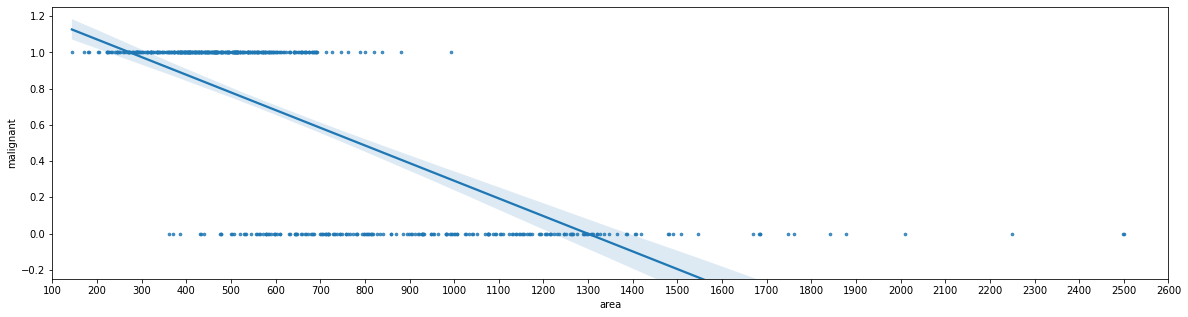

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame([[area[i], malignant[i]] for i in range(n)], columns=["area", "malignant"])
plt.figure(figsize=(20,5))
sns.regplot(x = "area", y = "malignant", data = df, scatter_kws={'s':7})

plt.ylim(-0.25,1.25)
plt.xticks([100*idx for idx in range(1,27,1)])
plt.show()